In [ ]:
from sklearn.datasets import load_iris, make_circles, make_moons
from matplotlib import pylab
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import euclidean

SEED = 42

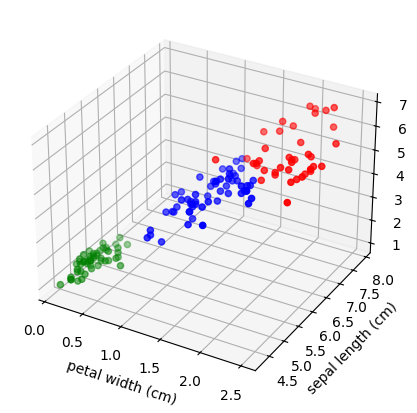

Coeficiente de silueta: 0.582


In [ ]:
iris = load_iris()
data = iris.data[:,[3,0,2]]
attr_names = iris.feature_names
colors = np.array(['r', 'g', 'b'])
kmeans = KMeans(n_clusters = 3, random_state=SEED)
kmeans.fit(data)
labels = kmeans.labels_

fig = pylab.figure(1, figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors[labels])
ax.set_xlabel(attr_names[3])
ax.set_ylabel(attr_names[0])
ax.set_zlabel(attr_names[2])
pylab.show()

print("Coeficiente de silueta: %0.3f" % silhouette_score(data, labels))

       name  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         1         0     0     4     0         0        1     1  
1         1         1         0     0     4     1         0        1     1  
2         1         0         0     1     0     1         0        0     4  
3         1         1         0     0     4     0         0        1     1  
4         1         1         0     0     4     1         0        1     1  
(101, 16)


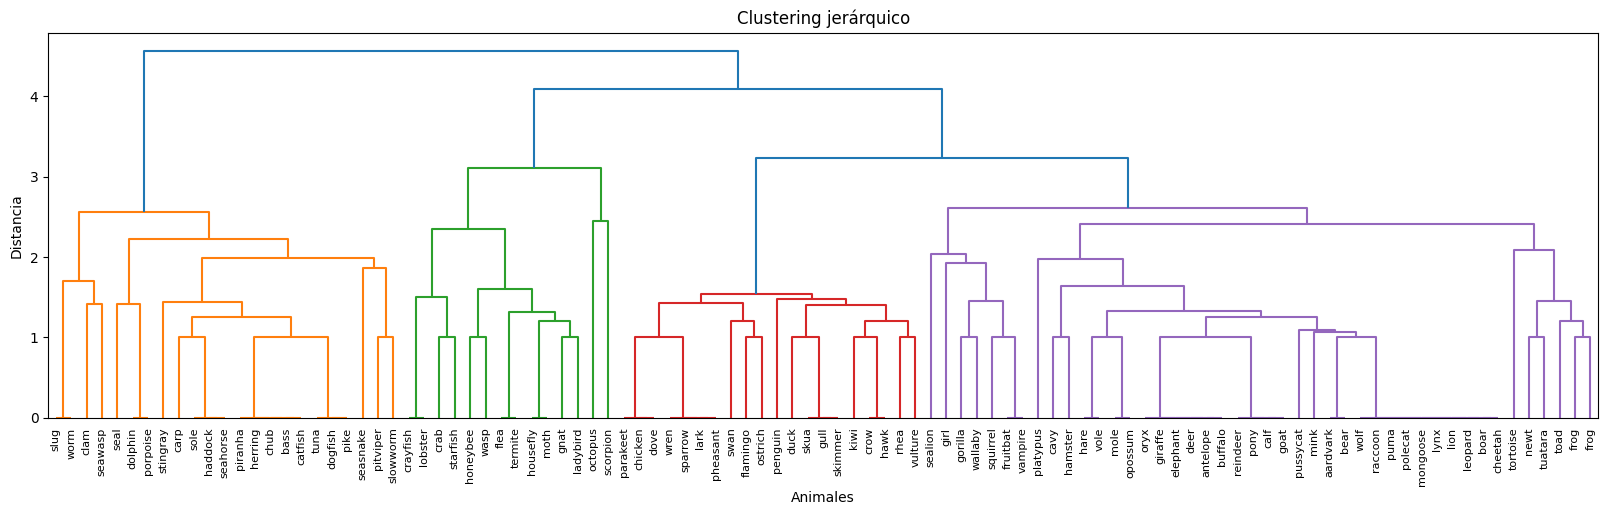

Se formaron los clusters: [1, 2, 3, 4, 5]
Se formaron los clusters: [1, 2, 3]


In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Zoo
headers = ["name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic",
"predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail",
"domestic", "catsize", "type"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
df = pd.read_csv(url, names = headers, sep = ",")
print(df.head(5))

data = df[headers[1:-1]].to_numpy()
classes = np.array( df["name"].to_numpy() )
print(data.shape)

matrix_distance = pdist(data, metric = 'euclidean')
matrix_linkage = linkage(matrix_distance, 'average')

fig = pylab.figure(3, figsize=(20,5))
pylab.title('Clustering jerárquico')
pylab.xlabel('Animales')
pylab.ylabel('Distancia')
dendrogram(
    matrix_linkage,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=classes
)
pylab.show()

h = 3
clusters = fcluster(matrix_linkage, h, 'distance')
print("Se formaron los clusters: "+str(list(set(clusters))))

h = 4
clusters = fcluster(matrix_linkage, h, 'distance')
print("Se formaron los clusters: "+str(list(set(clusters))))

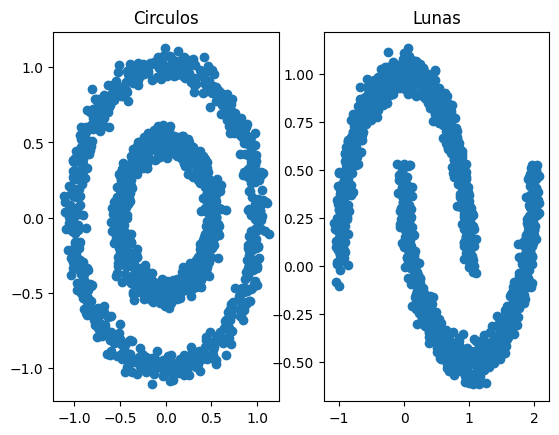

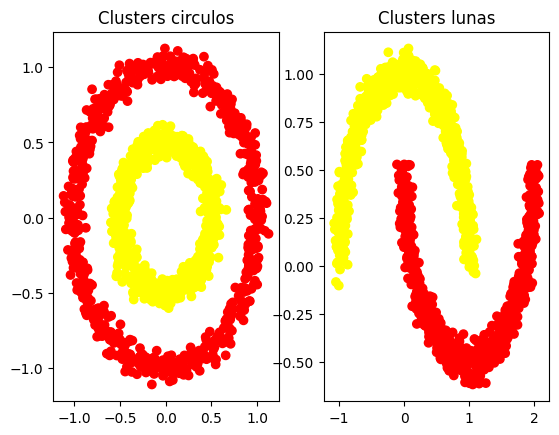

In [ ]:
n_muestras = 1500
circulos, true_circulos = make_circles(n_samples=n_muestras, noise=0.05, factor=.5)
lunas, true_lunas = make_moons(n_samples=n_muestras, noise=.05)

fig = pylab.figure(4)
pylab.subplot(1,2,1)
x,y = circulos[:,0], circulos[:,1]
pylab.scatter(x,y)
pylab.title('Circulos')
pylab.subplot(1,2,2)
x,y = lunas[:,0], lunas[:,1]
pylab.scatter(x,y)
pylab.title('Lunas')
fig.show()

colormap = np.array(['red', 'yellow'])
dbscan = DBSCAN(eps=.1).fit(circulos)
clusters_circulos = np.array(dbscan.labels_, dtype = int)
dbscan = DBSCAN(eps=.2).fit(lunas)
clusters_lunas = np.array(dbscan.labels_, dtype = int)

fig = pylab.figure(5)
pylab.subplot(1,2,1)
x,y = circulos[:,0], circulos[:,1]
pylab.scatter(x,y, c=colormap[clusters_circulos])
pylab.title('Clusters circulos')
pylab.subplot(1,2,2)
x,y = lunas[:,0], lunas[:,1]
pylab.scatter(x,y, c = colormap[clusters_lunas])
pylab.title('Clusters lunas')
fig.show()